<a href="https://colab.research.google.com/github/leviii008/CMP7239/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000  

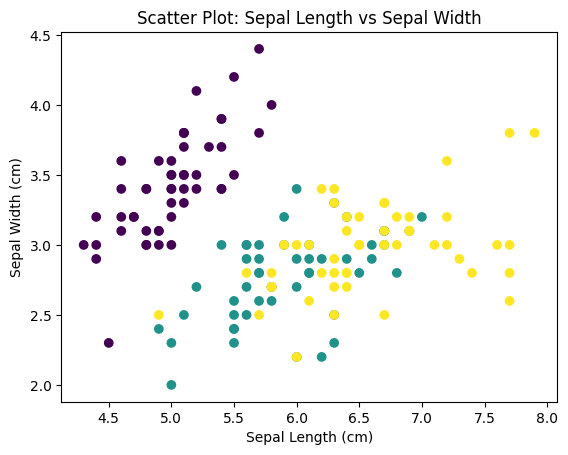

Accuracy of the Decision Tree model: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
F1 Score: 1.0


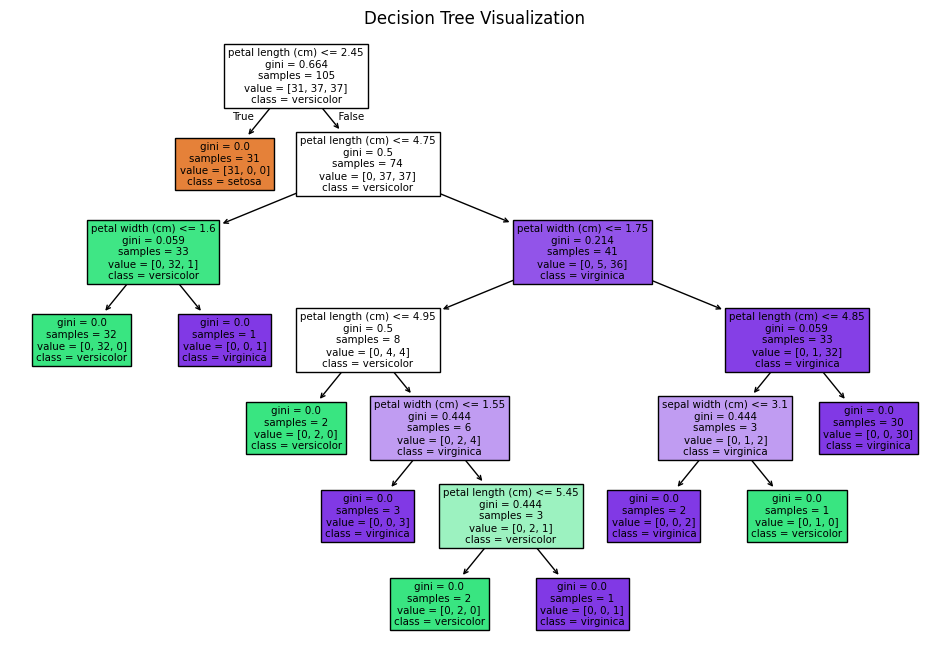

Feature Importances:
                   Importance
sepal length (cm)    0.000000
sepal width (cm)     0.019110
petal length (cm)    0.893264
petal width (cm)     0.087626
Model saved successfully as 'decision_tree_iris_model.joblib'


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import joblib  # for saving model

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for EDA
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y

# Basic info
print("Dataset Overview:")
print(iris_df.head())
print("\nBasic Statistics:")
print(iris_df.describe())
print("\nClass Distribution:")
print(iris_df['target'].value_counts())

# Visualization: Scatter plot of sepal length vs sepal width
plt.scatter(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], c=iris_df['target'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title("Scatter Plot: Sepal Length vs Sepal Width")
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Feature importances
feature_importances = pd.DataFrame(clf.feature_importances_, index=iris.feature_names, columns=["Importance"])
print("Feature Importances:")
print(feature_importances)

# Save the model
joblib.dump(clf, 'decision_tree_iris_model.joblib')
print("Model saved successfully as 'decision_tree_iris_model.joblib'")